# Tutorial 1: pandas
**Day 3, session 2:**

__Content creators:__ David Palecek, Paulo Martel

---
# Tutorial Objectives

* pandas basics
* Exercise
* Google drive mounting
* seaborn
* cleaning and exploratory analysis (Mod II)
* statistics (Mod II)

---
# Setup

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

---
# Section 1: Introduction

The tabular format is one of the most common ways of storing scientific data coming from experiments and observations. Software applications like Microsoft Excel allow us to manipulate and visualize such data in different ways to help bring out the most important features and trends.
Often, a mixture of data on different types, including real numbers, integer numbers and categorical values are combined in one very large table with many rows and columns. Rows and columns are very often labelled with headings, for example, in Excel worksheets. When analyzing data with these types of tools, it's very often convenient to add new columns to our tables, delete unneeded ones or create new columns based on numerical computations over existing rows or columns. So far, we haven't really touched on any construct of the Python language that seems adequate to address this situation.

With the very widespread usage of the Python language among data scientists and analysts, it's all but too natural that this issue was addressed in the form of a multi-tooled Python library. This library is called "Pandas" and it's constructed around a type of object (a Python class to be precise) called "DataFrame" which is designed to allow easy storage and manipulation of tabular data (and also time series data).

**Note:** Those familiar with the R programming language will recognize the dataframe type, which resembles its R counterpart in many ways.

---
Pandas dataframes can be created with the "DataFrame" method in a number of ways.

For instance, they can be created from a dict object, where the keys are column labels and the corresponding  values are lists of data to be contained in each column:

In [30]:
df = pd.DataFrame({ 'A': [2, 3, 4, 5, 6] , 'B': [4, 9, 16, 25, 36]})

In [31]:
type(df)

pandas.core.frame.DataFrame

In [32]:
df

,A,B
0,2,4
1,3,9
2,4,16
3,5,25
4,6,36


* A, B: *column labels*,
* *Index column*: a leftmost column starting at 0 and going up to 4 - this is the index column of the data frame and can be used to access and manipulate the data rows in different ways - when not specifically set, his column will consist of numbers ranging from zero to the n-1, where n is the number of rows.

In [33]:
# @title Print specific column
df['A']  # equivalent to df.A

0    2
1    3
2    4
3    5
4    6
Name: A, dtype: int64

In [34]:
df['B'].mean()

18.0

In [35]:
# @title Indexing different from NumPy
df[3,2]

KeyError: (3, 2)

In [36]:
df.iloc[1:3,1]

1     9
2    16
Name: B, dtype: int64

In [37]:
# @title Add new column
df['C'] = [8,9,3,5,6]
df

,A,B,C
0,2,4,8
1,3,9,9
2,4,16,3
3,5,25,5
4,6,36,6


In [38]:
# @title Another one
df['e'] = list('panda')  # pandas will not work because the length do not match
df

,A,B,C,e
0,2,4,8,p
1,3,9,9,a
2,4,16,3,n
3,5,25,5,d
4,6,36,6,a


In [39]:
# for adding "pandas" to work
df1 = pd.DataFrame({'char': list('pandas')})
df.merge(df1, left_index=True, right_index=True, how='right')

,A,B,C,e,char
0,2.0,4.0,8.0,p,p
1,3.0,9.0,9.0,a,a
2,4.0,16.0,3.0,n,n
3,5.0,25.0,5.0,d,d
4,6.0,36.0,6.0,a,a
5,NaN,NaN,NaN,NaN,s


In [40]:
df['Total'] = df['A'] + df['B'] + df['C']
df

,A,B,C,e,Total
0,2,4,8,p,14
1,3,9,9,a,21
2,4,16,3,n,23
3,5,25,5,d,35
4,6,36,6,a,48


In [41]:
# @title DataFrames handle mixed data types
df['D']= ['aaa','b','ccc','dd','eeeee']
df

,A,B,C,e,Total,D
0,2,4,8,p,14,aaa
1,3,9,9,a,21,b
2,4,16,3,n,23,ccc
3,5,25,5,d,35,dd
4,6,36,6,a,48,eeeee


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       5 non-null      int64 
 1   B       5 non-null      int64 
 2   C       5 non-null      int64 
 3   e       5 non-null      object
 4   Total   5 non-null      int64 
 5   D       5 non-null      object
dtypes: int64(4), object(2)
memory usage: 372.0+ bytes


To perform column-wise sums on a dataframe, the `axis=0` argument is useed with `sum(`)

In [43]:
df.sum(axis=0)

A                    20
B                    90
C                    31
e                 panda
Total               141
D        aaabcccddeeeee
dtype: object

In [44]:
# @title What is wrong here?
df.sum(axis=1)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [45]:
df[['A', 'B', 'C', 'Total']].sum(axis=1)

0    28
1    42
2    46
3    70
4    96
dtype: int64

In [46]:
df.sum(axis=1, numeric_only=True)

0    28
1    42
2    46
3    70
4    96
dtype: int64

In [47]:
# @title use chaining to achieve sum of values in columns B and C:
# (Remenber: slice notation "`[:,1:3]`" means "any row, columns 1 to 2")
# this shows also that you can chaing operations one after each other
df['SumBC'] = df.iloc[:, 1:3].sum(axis=1)
df

,A,B,C,e,Total,D,SumBC
0,2,4,8,p,14,aaa,12
1,3,9,9,a,21,b,18
2,4,16,3,n,23,ccc,19
3,5,25,5,d,35,dd,30
4,6,36,6,a,48,eeeee,42


While "iloc" selects values in the dataframe based on row and column position (pretty like slice notation in numpy arrays), the "loc" object indexer creates selection based on index and column labels. This selections can als support slice syntax, for instance:


In [48]:
df.index = ['1', '2', '3', '4', '5']
df.loc['1':'3','B':'D']

,B,C,e,Total,D
1,4,8,p,14,aaa
2,9,9,a,21,b
3,16,3,n,23,ccc


In [49]:
df.drop(columns=['D'])

,A,B,C,e,Total,SumBC
1,2,4,8,p,14,12
2,3,9,9,a,21,18
3,4,16,3,n,23,19
4,5,25,5,d,35,30
5,6,36,6,a,48,42


Notice that drop() returned a new dataframe, and df remains unchagend:
**Note**: Many methods have `inplace` argument, when the copy is not returned, and your DataFrame is redefined.

In [50]:
df

,A,B,C,e,Total,D,SumBC
1,2,4,8,p,14,aaa,12
2,3,9,9,a,21,b,18
3,4,16,3,n,23,ccc,19
4,5,25,5,d,35,dd,30
5,6,36,6,a,48,eeeee,42


In [51]:
df.drop(columns=['D'], inplace=True)
df

,A,B,C,e,Total,SumBC
1,2,4,8,p,14,12
2,3,9,9,a,21,18
3,4,16,3,n,23,19
4,5,25,5,d,35,30
5,6,36,6,a,48,42


We can also list and compute values in a conditional manner, combining logical expressions with indexing. Can you guess what does the below expression do?


In [52]:
df['CondSum'] = df.loc[df['C']>6,'A':'C'].sum(axis=1)


In [53]:
df

,A,B,C,e,Total,SumBC,CondSum
1,2,4,8,p,14,12,14.0
2,3,9,9,a,21,18,21.0
3,4,16,3,n,23,19,NaN
4,5,25,5,d,35,30,NaN
5,6,36,6,a,48,42,NaN


---
# Section 2: Exercise

In [32]:
# loading data
grades = pd.read_csv("https://raw.githubusercontent.com/pjmartel/python-for-scientists/master/datasets/grades_dataset.csv")

1.   You realize that the table is missing the grades of two of the students! The names are "Tyrion" and "Bronn" and their grades are respectively `[15.2,  16.7, 16.0]` and `[17.0,15.2,17.7]`. Please add the missing grades! (Hint: consider using the "`loc`" indexer)
2.   Calculate the student grade average of the three tests and place the values on a column labeled "Average"
3.   Calculate the grade average for each test and place the value on a bottom row labeled "test_averages"
4.  Create a new column named "Status" containing "Pass" or "Fail" depending on the grade average being higher or lower than 9.5. (Hint: look at the conditional expression above)
5. Some of the students who have an above 9.5 grade average will nevertheless fail because they a had a grade < 7 in at least one of the three tests. Write an
expression to correct the "Status" column accordingly (Hint: conditionals are again your friends, what does "`a or b or c`" evaluate  to when at least one of a, b and c is `False` ?)
6. Sort the data based on the column "Name" (Hint: search for sort methods for a data frame, using TAB completion or the "`dir`" command)

---
# Section 3: Plotting from DFs

* looks like matplotlib, and it is matplotlib, although we have not imported it.

<Axes: >

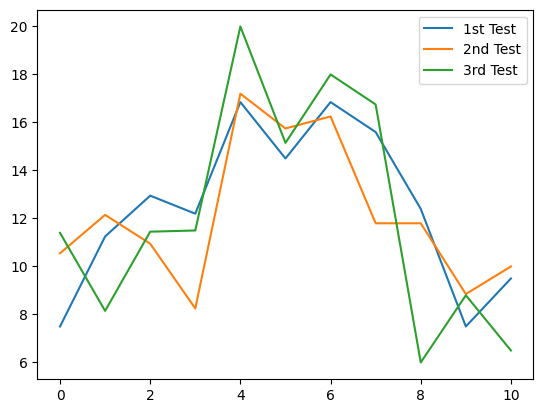

In [33]:
grades.plot()

<Axes: >

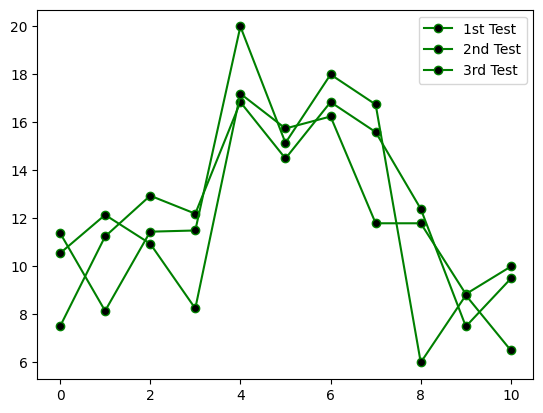

In [34]:
grades.plot(kind="line", style='go-',mfc='black')

---
# Section 4: Working with your data from Google drive

* Now that we haver prepared our "grades" dataframe with all the computations and columns, we may want to save it to a file, in a number of formats.

* Here we will see how to save to  a folder  in your google drive, in the Excel format.
* First, we need to *mount* our Google Drive on the VM file system. As explained in the "reading and writing files" notebook, we will use the google colab api with the authentication token mecanism:

In [37]:
from google.colab import drive

In [39]:
drive.mount('/gdrive')

MessageError: Error: credential propagation was unsuccessful

Now that our Google drive is mounted at mountpoint "/gdrive", let's export  our data frame to an Excel "xlsx" file using the dataframe method "`to_excel`" :

In [ ]:
grades.to_excel("/gdrive/My Drive/grades_colab.xlsx")

In [41]:
%ls /gdrive/My\ Drive

ls: cannot access '/gdrive/My Drive': No such file or directory


Now go to your Google Drive and try to open the "grades_colab.xlsx" file with Google Spreadsheets.

---
# Section 5: Seaborn

* Improved plotting from DFs
* Built on matplotlib, so you can still use what you learned

In [5]:
# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# adding names to the dataset
names = [iris.target_names[k] for k in iris.target]
iris_df['species'] = names
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

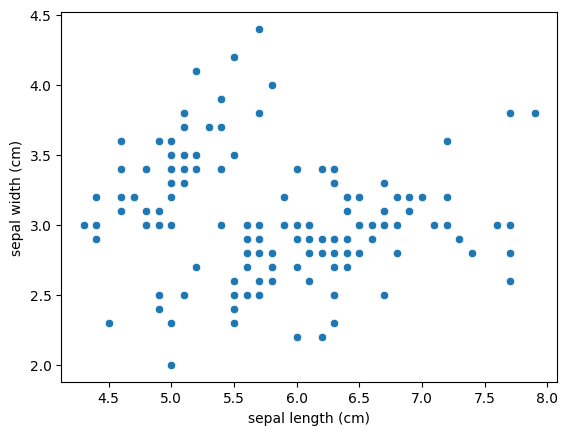

In [6]:
# @title scatter plot
# uncomment one by one to test properties, many more in the docs
sns.scatterplot(iris_df,
                x='sepal length (cm)',
                y='sepal width (cm)',
                # hue='species',
                # size='petal length (cm)',
               )

# matplotlib commands still work in seaborn (Uncomment and see)
# plt.legend(loc='right', bbox_to_anchor=(1.37, 0.5), ncol=1)
# plt.title('Iris dataset')
# plt.show()

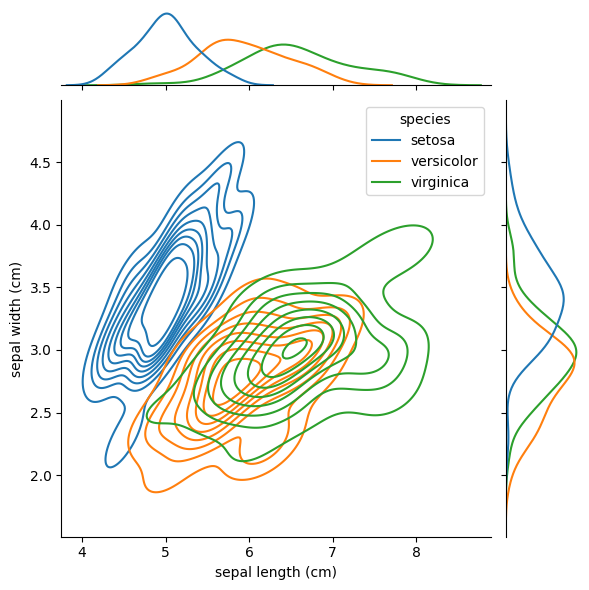

In [7]:
# @title jointplot
g = sns.jointplot(
    data=iris_df,
    x='sepal length (cm)', y='sepal width (cm)', hue="species",
    kind="kde",
)

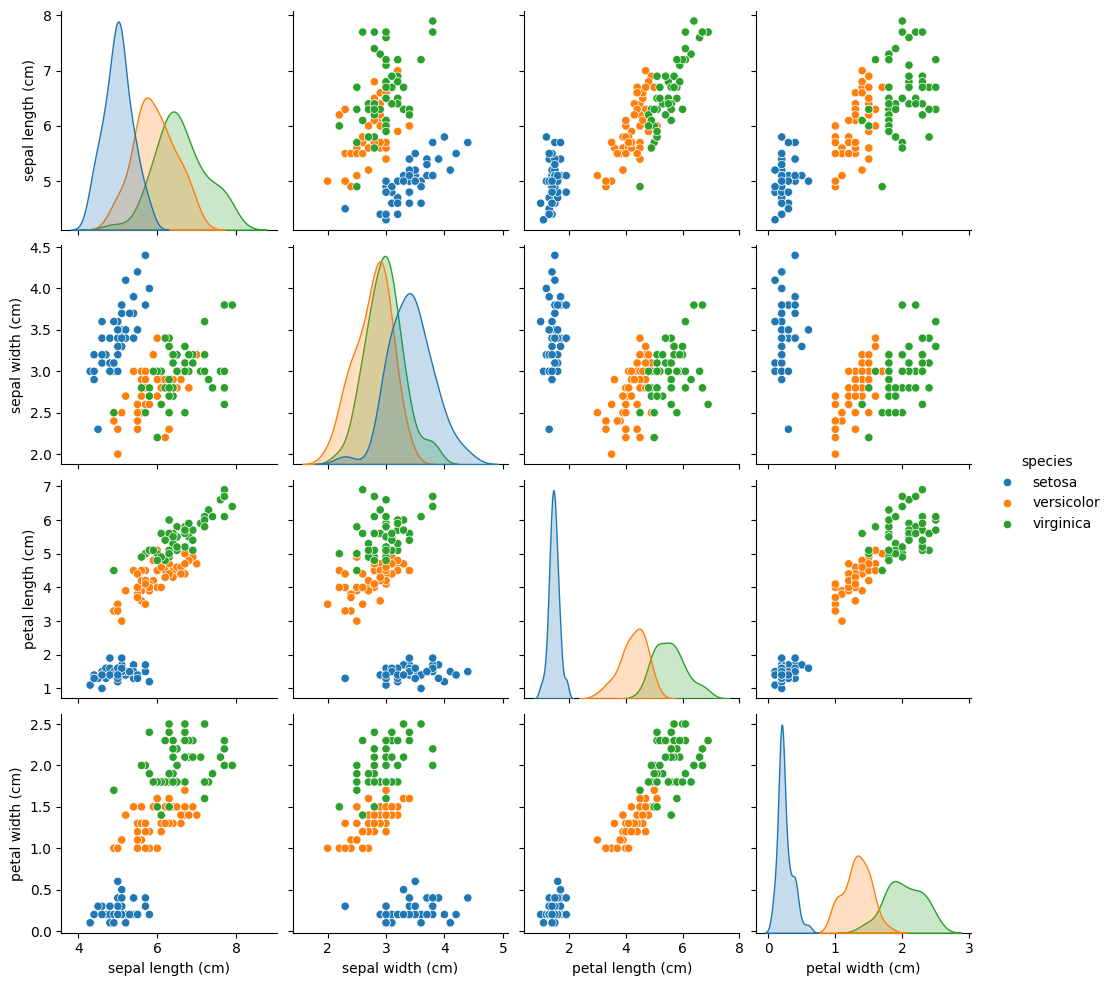

In [12]:
# @title pairplot
sns.pairplot(iris_df, hue="species")
plt.show()

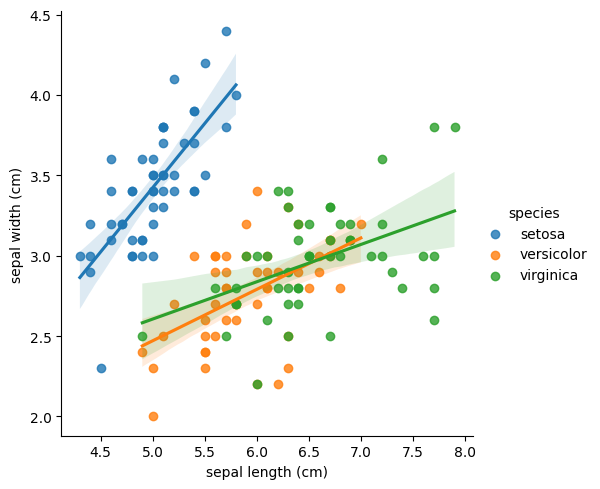

In [13]:
# @title linear regression
# by default, it does linear regression with 95% confidence intervals. you can change that and more.
sns.lmplot(iris_df, x='sepal length (cm)', y='sepal width (cm)', hue="species")
plt.show()

---
# Section 6: Exercise

* Make nice plots of even more famous titanic dataset
* you can inspire yourself from notebooks at https://www.kaggle.com/





In [54]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


(array([30., 17., 15.,  7., 20., 26., 21., 26., 18., 26., 14., 16., 21.,
         8.,  8., 11.,  4.,  5.,  4.,  4.]),
 array([ 0.42 ,  3.549,  6.678,  9.807, 12.936, 16.065, 19.194, 22.323,
        25.452, 28.581, 31.71 , 34.839, 37.968, 41.097, 44.226, 47.355,
        50.484, 53.613, 56.742, 59.871, 63.   ]),
 <BarContainer object of 20 artists>)

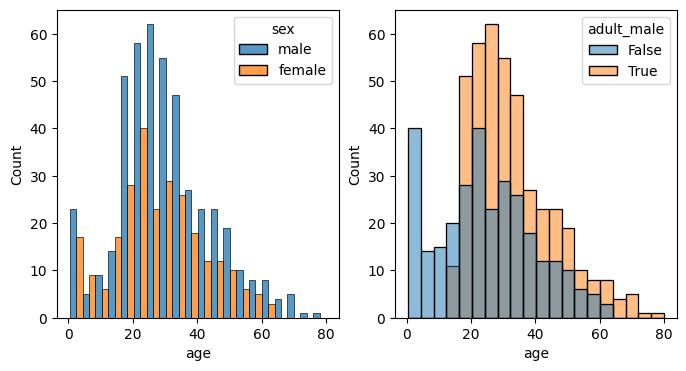

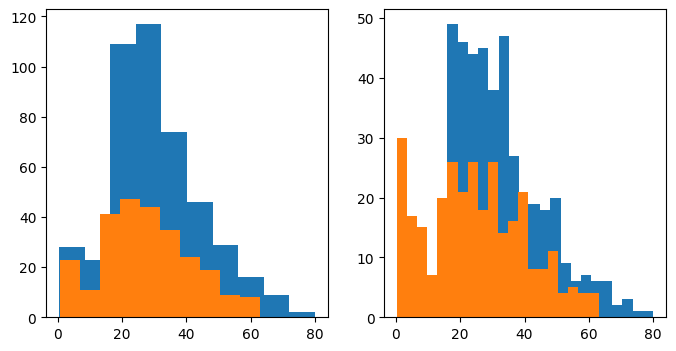

In [56]:
# place for your exploratory visualizations
# seaborn way for subplots.
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(titanic, x='age', hue='sex', ax=ax[0], multiple='dodge')
sns.histplot(titanic, x='age', hue='adult_male', ax=ax[1])

# matplotlib way
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].hist(titanic[titanic['sex']=='male']['age'])
ax[0].hist(titanic[titanic['sex']=='female']['age'])

ax[1].hist(titanic[titanic['adult_male']==True]['age'], bins=20)
ax[1].hist(titanic[titanic['adult_male']==False]['age'], bins=20)

---
# Feedback
* Please help us learn too.
* [feedback form](https://forms.gle/KyYS5AVZ1GPzqHVv5)